# **Тестовое задание**

Уважаемый кандидат!

В рамках данного тестового задания Вам будут предложены исследовательские задачи в области молекулярного моделирования и аналитики биомедицинских данных.
Для выполнения Вы можете использовать любые доступные и удобные Вам инструменты.

Желаем удачи!

## **Введение**  
Сахарный диабет 2 типа часто называют эпидемией XXI века: по некоторым прогнозам к 2030 году каждый десятый человек на планете будет страдать от этого недуга. Одним из подходов к лечению сахарного диабета 2 типа является применение инкретиномиметиков - небольших белковых молекул, являющихся аналогами нативных белков человека и активирующих рецепторы, ответственные за регуляцию функции поджелудочной железы (источника инсулина) и уровня глюкозы в плазме крови. На фармацевтическом рынке широко доступны молекулы этого класса - агонисты GLP-1R - рецептора глюкагоноподобного пептида первого типа. Однако в 2022 году FDA был одобрен новый продукт, призванный произвести революцию в сфере лечения СД2 и ожирения - тирзепатид, обладающий агонизмом как к GLP-1R, так и к GIPR - рецептору глюкозозависимого инсулинотропного полипептида.
В рамках данного задания Вам будут предложены данные о молекулах-кандидатах в лекарственное средство этого класса и возможность выбрать наиболее перспективное для разработки соединение.

## **Задание №1.**  
На первом этапе проекта была сгенерирована библиотека из ~100 тыс. кандидатов в лекарственное средство.

После оценки ряда *in silico* параметров в short-list попали 10 молекул, информация о которых представлена в таблице ниже:

| Lead     | Sequence| Molecular weight, Da| pI | GRAVY | GLP1-R_predicted_activity | GIPR_predicted_activity
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| Lead 1      | VAQGTFTSDYSSYLEPQAAMEFIRNLVKPRG|3476.87|6.15|-0.35|6.31|10.70
| Lead 2      | YAQGTFTSCVSSYLEYQAAKEFIANLVKGRG|3402.78|8.14|-0.09|53.43|29.44|
| Lead 3      | WAEGTETSDVSSYLEGQAAKEFIAWLVKGRG|3386.68|4.59|-0.36|86.72|92.91|
| Lead 4      | YAQGTFTSDYSILLDKKAQAAFIEYLLEGGPSSGAPPPS|4091.48|4.32|-0.19|64.55|15.87
| Lead 5      | YAQGTFTSDYPIMMDVRHQFDFVNHLLEFYGKKRDWQENIQQ|5197.73|5.38|-0.86|13.00|96.20
| Lead 6      | YAQGTYTSDYSIKMDPIHTFDFVCRLLAQRGKSNDVSETPTQ|4785.24|5.47|-0.65|4.73|15.74
| Lead 7      | YAEGTFTSDVSSYLEYQAAKKFIASLVKGGPSSGAPPPS|4009.38|6.18|-0.24|77.79|15.37|
| Lead 8      | YAQGTFTSDYSLYLEGQAAKEFIATLVKGGPSSGAPPPS|4007.37|4.68|-0.23|49.61|94.06|
| Lead 9      | YAEGTNTSDVSSYEEGQAAKEFIAWLVKGGPSSGAPPPS|3986.22|4.25|-0.56|31.10|44.03|
| Lead 10     | HAQGTFTSDYSKYLDEKAAKEFIQWLLQT|3419.75|5.48|-0.69|98.61|94.05|


Метаданные:
*   Lead - идентификатор исследуемой молекулы
*   Sequence - аминокислотная последовательность
*   Molecular weight, Da - молекулярная масса в Да
*   pI - изоэлектрическая точка
*   GRAVY - индекс гидрофобности
*   GLP1-R_predicted_activity - предсказанная клеточная активность в отношении GLP-1R в %, предсказания получены с помощью ранее обученной модели (R^2 = 0.89)
*   GIPR_predicted_activity - предсказанная клеточная активность в отношении GIPR в %, предсказания получены с помощью ранее обученной модели (R^2 = 0.92)

Проанализируйте датасет и сформулируйте научную гипотезу о взаимосвязи предсказанной клеточной активности в отношении рецепторов GLP-1R и GIPR с *in silico* дескрипторами. При необходимости можете оценить дополнительные дескрипторы аминокислотных последовательностей, например, с помощью библиотеки `biopython` (*не является обязательным*).

В поле ниже внесите сформулированную гипотезу и её краткое обоснование.

In [32]:
import pandas as pd

data = {
    'Lead': ['Lead 1', 'Lead 2', 'Lead 3', 'Lead 4', 'Lead 5', 'Lead 6', 'Lead 7', 'Lead 8', 'Lead 9', 'Lead 10'],
    'Sequence': [
        'VAQGTFTSDYSSYLEPQAAMEFIRNLVKPRG',
        'YAQGTFTSCVSSYLEYQAAKEFIANLVKGRG',
        'WAEGTETSDVSSYLEGQAAKEFIAWLVKGRG',
        'YAQGTFTSDYSILLDKKAQAAFIEYLLEGGPSSGAPPPS',
        'YAQGTFTSDYPIMMDVRHQFDFVNHLLEFYGKKRDWQENIQQ',
        'YAQGTYTSDYSIKMDPIHTFDFVCRLLAQRGKSNDVSETPTQ',
        'YAEGTFTSDVSSYLEYQAAKKFIASLVKGGPSSGAPPPS',
        'YAQGTFTSDYSLYLEGQAAKEFIATLVKGGPSSGAPPPS',
        'YAEGTNTSDVSSYEEGQAAKEFIAWLVKGGPSSGAPPPS',
        'HAQGTFTSDYSKYLDEKAAKEFIQWLLQT'
    ],
    'MW, Da': [
        3476.87, 3402.78, 3386.68, 4091.48, 5197.73, 4785.24, 4009.38, 4007.37, 3986.22, 3419.75
    ],
    'pI': [
        6.15, 8.14, 4.59, 4.32, 5.38, 5.47, 6.18, 4.68, 4.25, 5.48
    ],
    'GRAVY': [
        -0.35, -0.09, -0.36, -0.19, -0.86, -0.65, -0.24, -0.23, -0.56, -0.69
    ],
    'GLP1-R_predicted_activity': [
        6.31, 53.43, 86.72, 64.55, 13.00, 4.73, 77.79, 49.61, 31.10, 98.61
    ],
    'GIPR_predicted_activity': [
        10.70, 29.44, 92.91, 15.87, 96.20, 15.74, 15.37, 94.06, 44.03, 94.05
    ]
}

df = pd.DataFrame(data)


In [33]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def calculate_descriptors(sequence):
    analyzed_seq = ProteinAnalysis(sequence)
    aromaticity = analyzed_seq.aromaticity()
    instability_index = analyzed_seq.instability_index()
    return aromaticity, instability_index

df['Aromaticity'] = None
df['Instability Index'] = None

for index, row in df.iterrows():
    sequence = row['Sequence']
    aromaticity, instability_index= calculate_descriptors(sequence)
    df.at[index, 'Aromaticity'] = aromaticity
    df.at[index, 'Instability Index'] = instability_index

display(df)

,Lead,Sequence,"MW, Da",pI,GRAVY,GLP1-R_predicted_activity,GIPR_predicted_activity,Aromaticity,Instability Index
0,Lead 1,VAQGTFTSDYSSYLEPQAAMEFIRNLVKPRG,3476.87,6.15,-0.35,6.31,10.70,0.129032,25.006452
1,Lead 2,YAQGTFTSCVSSYLEYQAAKEFIANLVKGRG,3402.78,8.14,-0.09,53.43,29.44,0.16129,26.448387
2,Lead 3,WAEGTETSDVSSYLEGQAAKEFIAWLVKGRG,3386.68,4.59,-0.36,86.72,92.91,0.129032,12.090323
3,Lead 4,YAQGTFTSDYSILLDKKAQAAFIEYLLEGGPSSGAPPPS,4091.48,4.32,-0.19,64.55,15.87,0.128205,61.448718
4,Lead 5,YAQGTFTSDYPIMMDVRHQFDFVNHLLEFYGKKRDWQENIQQ,5197.73,5.38,-0.86,13.00,96.20,0.190476,53.616905
5,Lead 6,YAQGTYTSDYSIKMDPIHTFDFVCRLLAQRGKSNDVSETPTQ,4785.24,5.47,-0.65,4.73,15.74,0.119048,21.069048
6,Lead 7,YAEGTFTSDVSSYLEYQAAKKFIASLVKGGPSSGAPPPS,4009.38,6.18,-0.24,77.79,15.37,0.128205,49.44359
7,Lead 8,YAQGTFTSDYSLYLEGQAAKEFIATLVKGGPSSGAPPPS,4007.37,4.68,-0.23,49.61,94.06,0.128205,44.505128
8,Lead 9,YAEGTNTSDVSSYEEGQAAKEFIAWLVKGGPSSGAPPPS,3986.22,4.25,-0.56,31.10,44.03,0.102564,49.838462
9,Lead 10,HAQGTFTSDYSKYLDEKAAKEFIQWLLQT,3419.75,5.48,-0.69,98.61,94.05,0.172414,26.47931


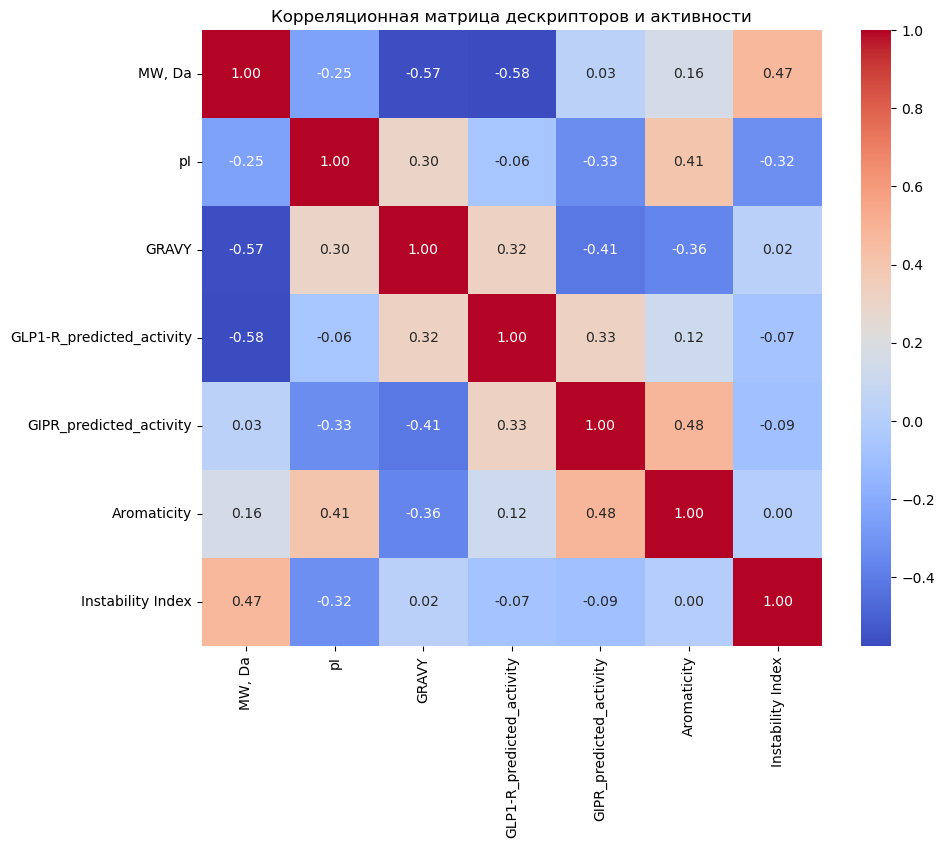

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


data = df.drop(columns=['Sequence','Lead'])

correlation_matrix = data[['MW, Da', 'pI', 'GRAVY', 'GLP1-R_predicted_activity', 'GIPR_predicted_activity', 'Aromaticity', 'Instability Index']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица дескрипторов и активности')
plt.show()

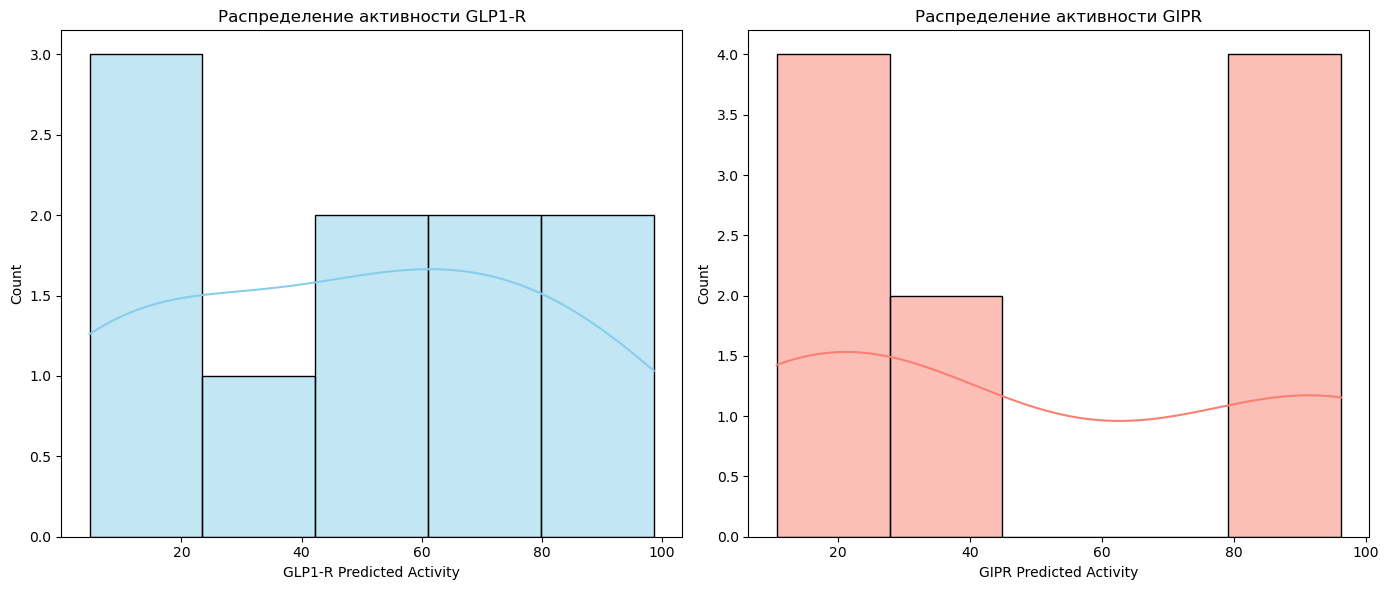

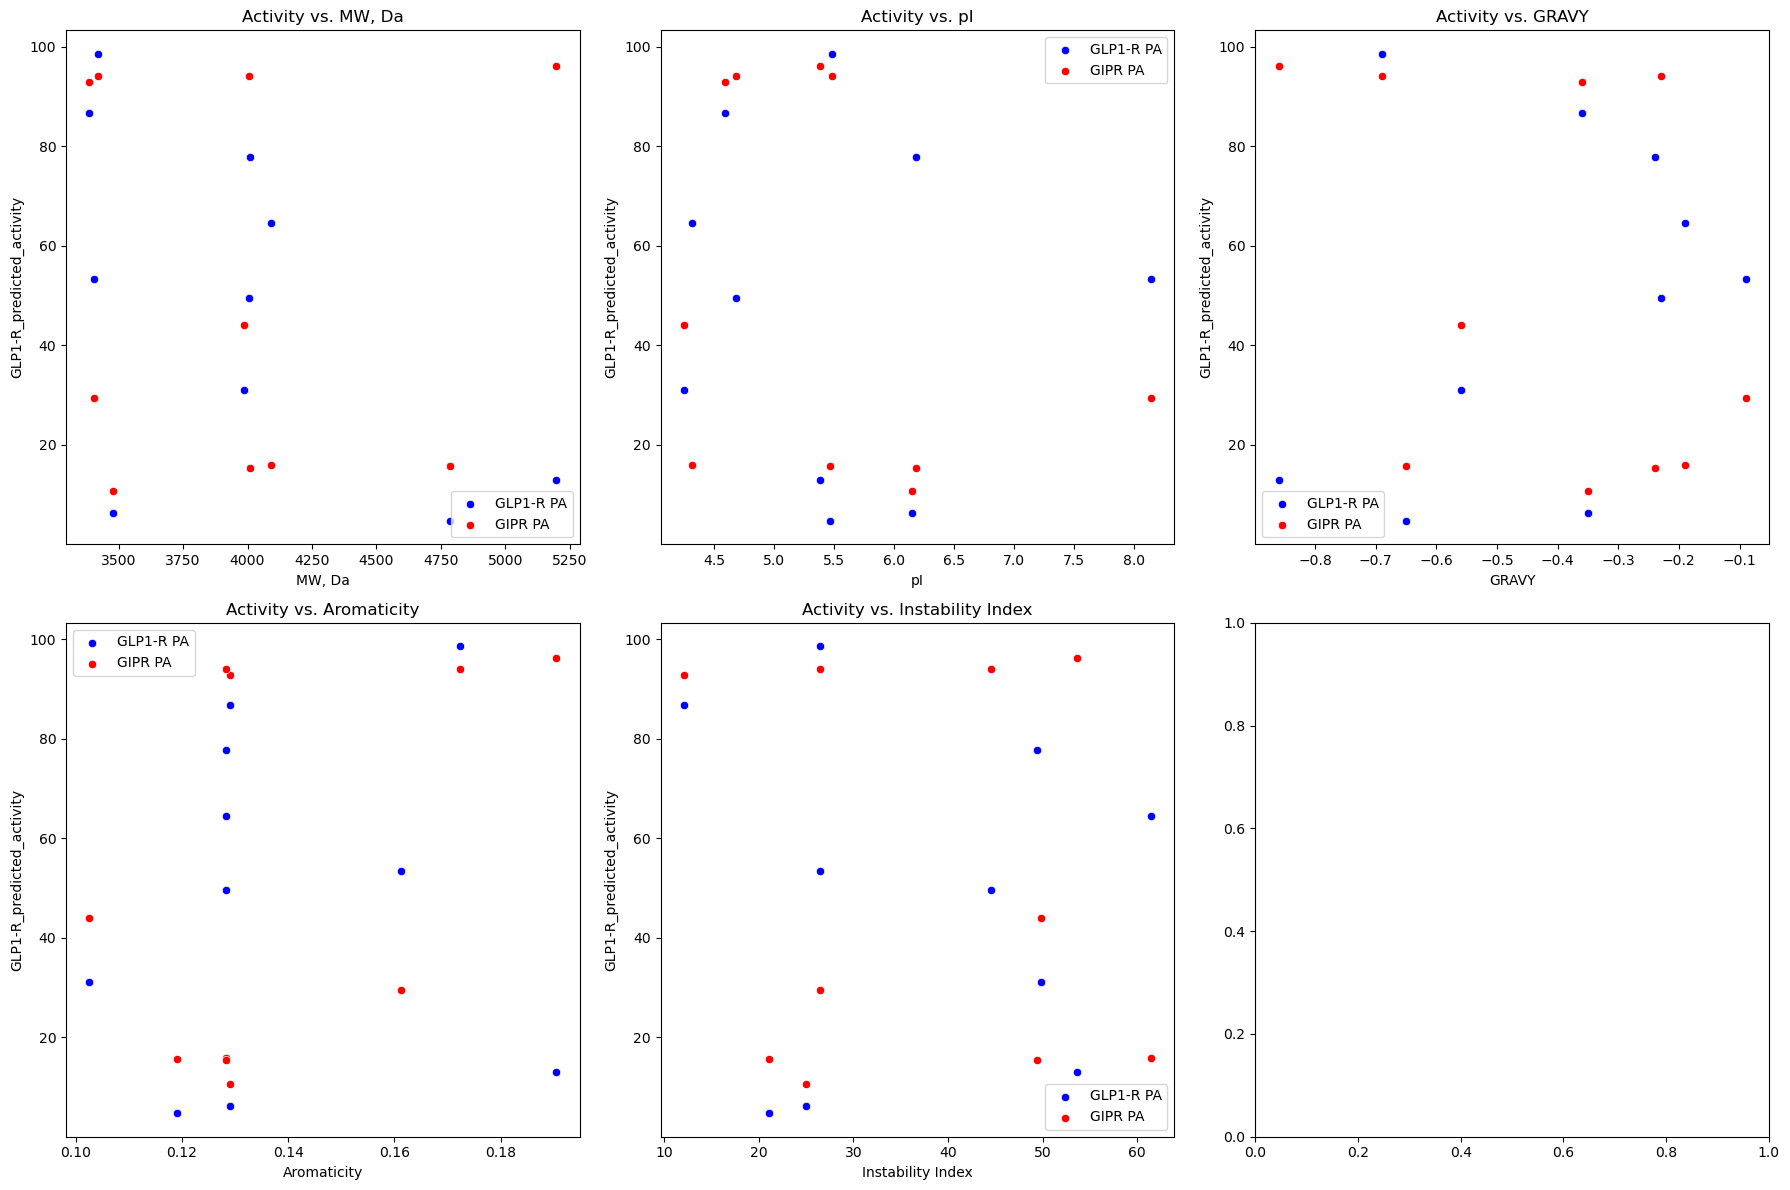

In [35]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['GLP1-R_predicted_activity'], kde=True, color='skyblue')
plt.title('Распределение активности GLP1-R')
plt.xlabel('GLP1-R Predicted Activity')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data['GIPR_predicted_activity'], kde=True, color='salmon')
plt.title('Распределение активности GIPR')
plt.xlabel('GIPR Predicted Activity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
descriptors = ['MW, Da', 'pI', 'GRAVY', 'Aromaticity', 'Instability Index']

for i, descriptor in enumerate(descriptors):
    sns.scatterplot(ax=axes[i], data=data, x=descriptor, y='GLP1-R_predicted_activity', color='blue', label='GLP1-R PA')
    sns.scatterplot(ax=axes[i], data=data, x=descriptor, y='GIPR_predicted_activity', color='red', label='GIPR PA')
    axes[i].set_title(f'Activity vs. {descriptor}')
    axes[i].legend()

plt.tight_layout()
plt.show()

**Гипотеза**: Наш анализ показал, что просто посмотреть на характеристики белков и попытаться угадать, как они будут взаимодействовать с рецепторами, не работает — связь не прослеживается. Похоже, дело гораздо сложнее. Предлагаю применить более мощные компьютерные методы для анализа или проверить наши предположения на практике в лаборатории.

## **Задание №2.**  

Разработчик согласился проверить вашу гипотезу экспериментально - оценить клеточную активность *in vitro* для всех молекул из short-list. В тестах оценивали параметр EC50 по накоплению в цитоплазме клеток циклического АМФ (цАМФ), вызванному активацией целевых рецепторов. Тесты ставили в 10 независимых повторностях для каждого рецептора, рассчитывали среднее и стандартное отклонение. Результаты представлены ниже:

| Lead     | GLP-1R EC50, нМ| GIPR EC50, нМ|
| ----------- | ----------- | ----------- |
| GLP-1       | 0.0148      | ND          |
| GIP         | ND          | 0.004       |
| Lead 1      | 0.0440      | 0.0146      |
| Lead 2      | 0.0423      | 0.0045      |
| Lead 3      | 0.0174      | 0.0045      |
| Lead 4      | 0.0388      | ND          |
| Lead 5      | 0.0288      | 0.0033      |
| Lead 6      | 0.0941      | 0.0067      |
| Lead 7      | 0.0161      | 0.0226      |
| Lead 8      | 0.0242      | 0.0037      |
| Lead 9      | 0.0158      | 0.0044      |
| Lead 10     | 0.0139      | 0.0036      |

*Примечание. ND - активность экспериментально не определена.*

Проанализируйте экспериментальные данные. Удалось ли подтвердить или опровергнуть вашу гипотезу? Почему?

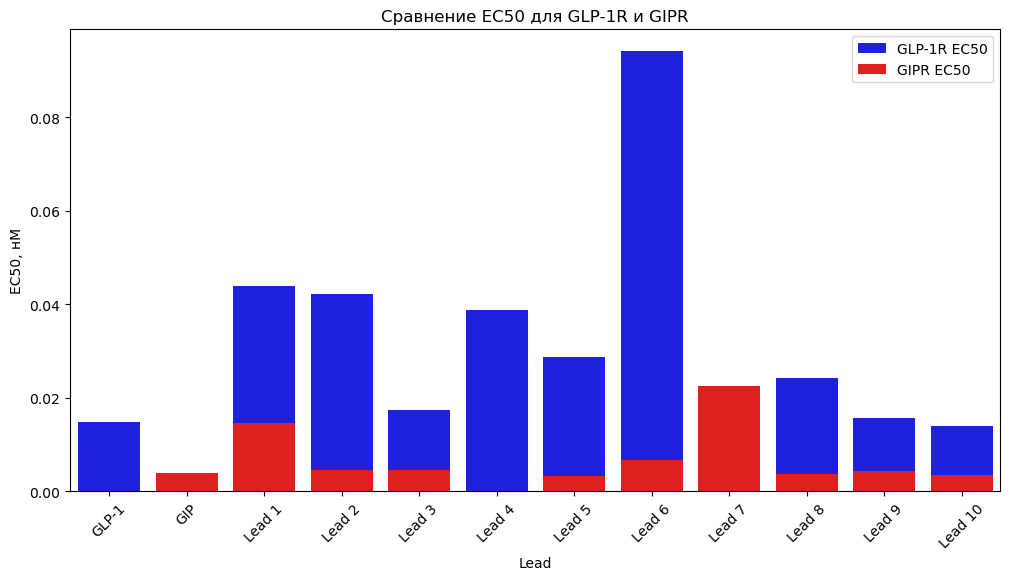

In [36]:
import numpy as np

experimental_results = pd.DataFrame({
    'Lead': ['GLP-1', 'GIP', 'Lead 1', 'Lead 2', 'Lead 3', 'Lead 4', 'Lead 5', 'Lead 6', 'Lead 7', 'Lead 8', 'Lead 9', 'Lead 10'],
    'GLP-1R EC50, нМ': [0.0148, np.nan, 0.0440, 0.0423, 0.0174, 0.0388, 0.0288, 0.0941, 0.0161, 0.0242, 0.0158, 0.0139],
    'GIPR EC50, нМ': [np.nan, 0.004, 0.0146, 0.0045, 0.0045, np.nan, 0.0033, 0.0067, 0.0226, 0.0037, 0.0044, 0.0036]
})

combined_df = pd.merge(df, experimental_results, on='Lead', how='left')

plt.figure(figsize=(12, 6))
sns.barplot(x='Lead', y='GLP-1R EC50, нМ', data=experimental_results, color='blue', label='GLP-1R EC50')
sns.barplot(x='Lead', y='GIPR EC50, нМ', data=experimental_results, color='red', label='GIPR EC50')
plt.title('Сравнение EC50 для GLP-1R и GIPR')
plt.xticks(rotation=45)
plt.ylabel('EC50, нМ')
plt.legend()
plt.show()


После тщательного анализа и экспериментов пришли к выводу: прямой связи между базовыми характеристиками наших молекул и их влиянием на рецепторы нет. Получается, дело не только в размере или заряде молекулы. Нужно копать глубже, возможно, учитывать их трехмерную структуру или как они взаимодействуют с другими молекулами внутри клетки.

Вероятно есть диапазон в котором должны находиться свойства, но по скольку у нас не цельная выборка, а только лиды сказать об этом сложно.

## **Задание №3.**  

На следующем этапе проекта необходимо выбрать молекулы для проведения доклинических исследований *in vivo*. В них на животной модели сахарного диабета будет оцениваться влияние исследуемых соединений на уровень глюкозы и потребление пищи. Поскольку исследования на животных очень ресурсоемкие, Вам предстоит выбрать **одну молекулу** с наибольшим потенциалом для дальнейшей разработки.

В поле ниже укажите номер наиболее перспективного лида и обоснуйте свой выбор.

In [37]:
cleaned_results = experimental_results.dropna()
sorted_results = cleaned_results.sort_values(by=['GLP-1R EC50, нМ', 'GIPR EC50, нМ'])
display(sorted_results)

,Lead,"GLP-1R EC50, нМ","GIPR EC50, нМ"
11,Lead 10,0.0139,0.0036
10,Lead 9,0.0158,0.0044
8,Lead 7,0.0161,0.0226
4,Lead 3,0.0174,0.0045
9,Lead 8,0.0242,0.0037
6,Lead 5,0.0288,0.0033
3,Lead 2,0.0423,0.0045
2,Lead 1,0.0440,0.0146
7,Lead 6,0.0941,0.0067


In [ ]:
from pathlib import Path
import re
import py3Dmol

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def read_and_visualize_pdb_file(file_path, style='cartoon'):
    pdb_content = file_path.read_text()
    
    view = py3Dmol.view(width=400, height=300)
    view.addModel(pdb_content, 'pdb')
    
    if style == 'cartoon':
        view.setStyle({'cartoon': {'color': 'spectrum'}})
    elif style == 'sphere':
        view.setStyle({'sphere': {'color': 'blue'}})
    
    view.zoomTo()
    return view

pdb_folder = Path('pdb_drug')
pdb_files = sorted([f for f in pdb_folder.glob('lead*.pdb')], key=lambda x: natural_sort_key(x.stem))

for pdb_file in pdb_files:
    view = read_and_visualize_pdb_file(pdb_file)
    print(f'File {pdb_file}')
    view.show()


Выбрал структуру у которой наименьшие значения EC50 для обоих белков.
Это lead10:

![pic1](pic1.png)

Для всех пептидов были созданы PDB файлы с помощью **AlphaFold2**, которые теперь находятся в папке `pdb_drug`. После этого на сайте [RCSB](https://www.rcsb.org) была найдена структура GIPR, связанного нативным лигандом GIP, под идентификатором [7RA3](https://www.rcsb.org/structure/7RA3). Соответствующий файл `7ra3.pdb`.

Используя **PyMOL**, были удалены все белки, кроме GIPR и GIP, а на место GIP установлена структура `lead10`, выбранная нами для дальнейшего анализа. Процесс можно наблюдать в сессии PyMOL, сохраненной в файле `analysis.pse`. Уже на этом этапе заметно значительное сходство между GIP и нашим соединением, несмотря на небольшие различия в аминокислотных остатках.

Было решено провести релаксацию белка, чтобы расслабить структуру и увидеть его взаимодействия с пептидом. Комплекс GIPR/lead10 был сохранен в формате PDB. С помощью **PDBFixer** были исправлены недостающие остатки, добавлены водный бокс и ионы, после чего была проведена молекулярно-динамическая симуляция с использованием **GROMACS**.


## **Задание №4.**  

Пока коллеги в лаборатории нарабатывают субстанцию для *in vivo* исследований, Вам предстоит завершить *in silico* характеризацию молекулы, выбранной в **Задании №3**.

Используя любые инструменты и источники информации смоделируйте 3D-структуру пептидного лиганда и его комплекса с одним из целевых рецепторов - GLP-1R или GIPR человека (на Ваш выбор). Сохраните полученные структурные файлы: они должны быть приложены к выполненному заданию.

При использовании GoogleColab приведите код в ячейке ниже, при использовании сторонних инструментов - кратко опишите алгоритм, по которому производили моделирование.

## Процесс Молекулярной Динамики

### Подготовка
- **Структура**: Начали с PDB файла нашей молекулы.
- **Топология**: С помощью `pdb2gmx` сгенерили топологию, выбрали силовое поле.
- **Ящик**: Определили размер с `editconf`
- **Растворитель**: Добавили воду через `solvate`, получили гидратированную систему.

### Настройка
- **Ионы**: Нейтрализовали заряд системы, добавили нужные ионы.
- **Минимизация**: Устранили стерические конфликты, минимизировали энергию системы.

### Эквилибрация
- **NVT**: Сначала установили температуру.
- **NPT**: Затем давление, добились равновесия.

### Симуляция
- **MD**: Запустили основную симуляцию, собрали данные по динамике.

### Анализ
- **RMSD**: Оценили стабильность и конформационные изменения.


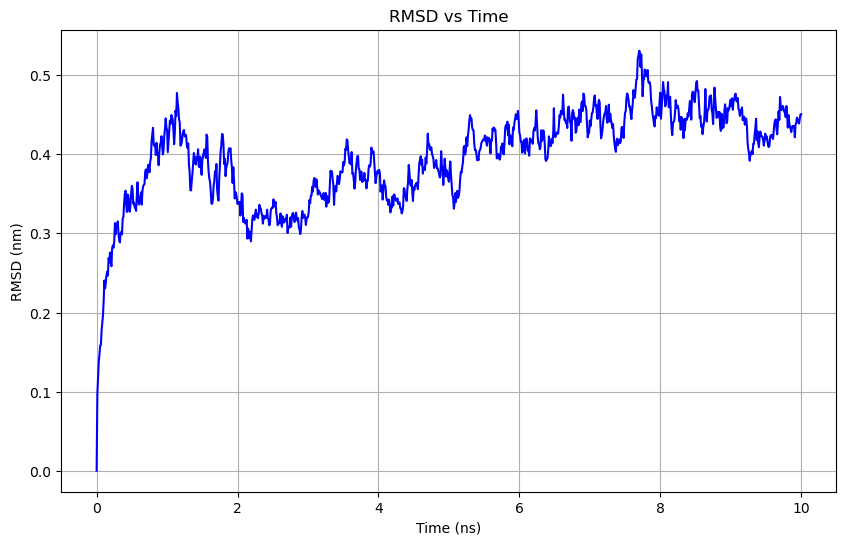

In [1]:
import matplotlib.pyplot as plt


file_path = 'rmsd.xvg'

time_ns = []
rmsd_nm = []
with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith(('@', '#')):
            columns = line.split()
            time_ns.append(float(columns[0]))
            rmsd_nm.append(float(columns[1]))


import matplotlib.pyplot as plt


file_path = 'rmsd.xvg'

time_ns = []
rmsd_nm = []
with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith(('@', '#')):
            columns = line.split()
            time_ns.append(float(columns[0]))
            rmsd_nm.append(float(columns[1]))


plt.figure(figsize=(10, 6))
plt.plot(time_ns, rmsd_nm, linestyle='-', color='blue')
plt.title("RMSD vs Time")
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.grid(True)
plt.show()


- **Колебания RMSD**: Оставались в пределах `0.3 - 0.5 нм`, что говорит о стабильности.
- **Лиганд и белок**: Лиганд остался на месте, тесно связанный с белком.
- **Структура белка**: Осталась целой, без распада или крупных изменений.

**Вывод**: Система показала себя устойчивой, взаимодействие между белком и лигандом оказалось надежным на протяжении всей симуляции.

##**Поздравляем, Вы дошли до самого конца!**  

Пожалуйста, экспортируйте данный ноутбук, содержащий ответы на поставленные вопросы в виде текстовых полей или комментариев к коду, а также приложите к нему:  
- полученную 3D-структуру лиганда,
- 3D-структуру комплекса лиганд-рецептор,
- любые дополнительные файлы, которые посчитаете нужными.  

Если Вы использовали какие-либо инструменты вне данного ноутбука, пожалуйста, убедитесь, что указали их, отвечая на вопросы.
